# Crop Yield prediction Model


In [1]:
import os
import json
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
drive_dir = "drive/MyDrive/crop_yield/"
(not os.path.exists(drive_dir)) and os.mkdir(drive_dir)

False

In [3]:
with zipfile.ZipFile("{}crop_yield_dataset.zip".format(drive_dir), mode="r") as data:
  data.extractall("./datasets/")

In [5]:
datasets_dir = "./datasets/"
# View dataset files
os.listdir(datasets_dir)

['kenya-sorghum-production-by-counties-2012-2016.csv',
 'kenya-cassava-production-by-counties.csv',
 'kenya-wheat-production-by-counties-2012-2016.csv',
 'kenya-maize-production-by-counties-2012-2016.csv',
 'kenya-dry-beans-production-by-counties-2012-2016.csv',
 'kenya-rice-production-by-counties-2012-2016.csv']

In [94]:
sorghum_df = pd.read_csv("{}kenya-sorghum-production-by-counties-2012-2016.csv".format(datasets_dir))
wheat_df = pd.read_csv("{}kenya-wheat-production-by-counties-2012-2016.csv".format(datasets_dir))
maize_df = pd.read_csv("{}kenya-maize-production-by-counties-2012-2016.csv".format(datasets_dir))
maize_df = pd.DataFrame(maize_df.loc[1:]) # Just correcting the dataset
dry_beans_df = pd.read_csv("{}kenya-dry-beans-production-by-counties-2012-2016.csv".format(datasets_dir))
rice_df = pd.read_csv("{}kenya-rice-production-by-counties-2012-2016.csv".format(datasets_dir))

dframes = [sorghum_df, wheat_df, maize_df, dry_beans_df, rice_df]

In [95]:
standard_columns = ["county", "year", "area (HA)", "production (MT)", "yield (MT/HA)"]

In [96]:
custom_dframes = []
for df in dframes:
  column_rename_dict = dict(zip(df.keys(), standard_columns))
  custom_dframes.append(df.rename(columns=column_rename_dict))

In [97]:
sorghum_df, wheat_df, maize_df, dry_beans_df, rice_df = custom_dframes

In [98]:
# view a sample dataframe

maize_df.head()

,county,year,area (HA),production (MT),yield (MT/HA)
1,Baringo,2012,"39,753","71,867",1.81
2,Bomet,2012,"32,697","73,278",2.24
3,Bungoma,2012,"96,209","262,381",2.73
4,Busia,2012,"41,990","50,102",1.19
5,Elgeyo/Marakwet,2012,"31,533","91,964",2.92


## Combining the diverse data into one dataset

In [99]:
sorghum_df["crop"] = "sorghum"
wheat_df["crop"] = "wheat"
maize_df["crop"] = "maize"
dry_beans_df["crop"] = "dry beans"
rice_df["crop"] = "rice"

dataset = pd.concat([sorghum_df, wheat_df, maize_df, dry_beans_df, rice_df], ignore_index=True)

In [100]:
rows, cols = dataset.shape
"Samples: {}, Columns: {}".format(rows, cols)

'Samples: 889, Columns: 6'

In [101]:
dataset.describe()

,county,year,area (HA),production (MT),yield (MT/HA),crop
count,889,889,889,889,889.0,889
unique,52,10,775,768,271.0,5
top,Nyeri,2012,-,-,0.7,sorghum
freq,25,131,18,18,43.0,235


In [102]:
dataset.isna().sum()

county             0
year               0
area (HA)          0
production (MT)    0
yield (MT/HA)      0
crop               0
dtype: int64

## Visualization & Data Definition
### * Data Types definition
### * Model Inputs definition
  * county
  * year
  * area

### * Model Outputs
  * production in MT
  * yield (MT/HA  )

In [103]:
dataset.dtypes

county             object
year               object
area (HA)          object
production (MT)    object
yield (MT/HA)      object
crop               object
dtype: object

In [104]:
dataset['year'] = dataset['year'].astype(int)
dataset['area (HA)'] = dataset['area (HA)'].replace(r'[^\d\.]+', np.nan, regex=True).astype(float)
dataset['production (MT)'] = dataset['production (MT)'].replace(r'[^\d\.]+', np.nan, regex=True).astype(float)
dataset['yield (MT/HA)'] = dataset['yield (MT/HA)'].replace(r'[^\d\.]+', np.nan, regex=True).astype(float)

In [105]:
dataset.dtypes

county              object
year                 int64
area (HA)          float64
production (MT)    float64
yield (MT/HA)      float64
crop                object
dtype: object

In [106]:
dataset.head()

,county,year,area (HA),production (MT),yield (MT/HA),crop
0,Baringo,2012,1110.0,906.0,0.82,sorghum
1,Bomet,2012,426.0,584.0,1.37,sorghum
2,Bungoma,2012,1034.0,1154.0,1.12,sorghum
3,Busia,2012,7683.0,8627.0,1.12,sorghum
4,Elgeyo/Marakwet,2012,1187.0,2448.0,2.06,sorghum


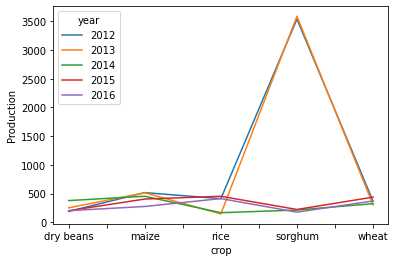

In [108]:
# Visualization

pivot_df = pd.pivot_table(dataset, values='production (MT)', index=['crop'], columns=['year'])
pivot_df.plot(kind='line')
plt.ylabel('Production')
plt.show()

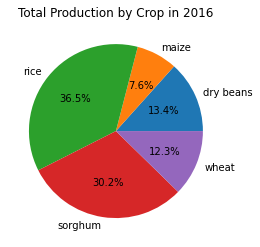

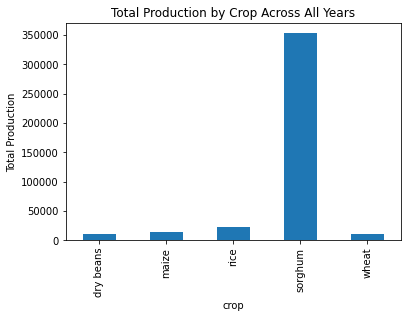

In [112]:
grouped_df = dataset.groupby(['crop', 'year'])['production (MT)'].sum()
grouped_df.loc[:, 2016].plot(kind='pie', ylabel='', autopct='%1.1f%%')
plt.title('Total Production by Crop in 2016')
plt.show()

grouped_df.groupby(['crop']).sum().plot(kind='bar', ylabel='Total Production', legend=False)
plt.title('Total Production by Crop Across All Years')
plt.show()

In [114]:
dataset.shape

(889, 6)

In [116]:
dataset.to_csv("{}cleaned_dataset.csv".format(drive_dir))